In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('advertising (1).csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#describe dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


 # checking for null values

<AxesSubplot:>

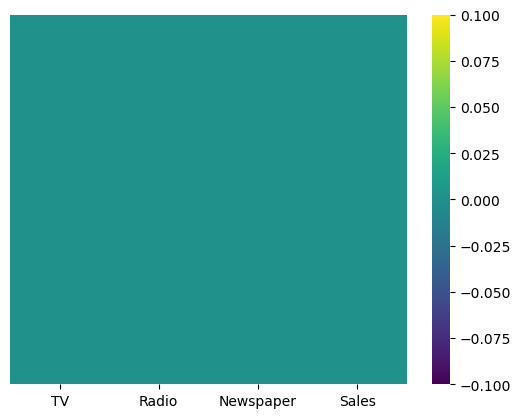

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
# Observation: In given dataset there are no null values are present

In [9]:
#checking unique values of columns
for i in df.columns:
    print('---------',i,'---------')
    print(df[i].unique())
    print('-----------------------')

--------- TV ---------
[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7  53.5
 261.3 239.3 102.7 131.1  69.   31.5 139.3 216.8 199.1 109.8  26.8 129.4
 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4 213.5 193.2
  76.3 110.7  88.3 134.3  28.6 217.7 250.9 107.4 163.3 197.6 184.9 289.7
 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4  13.1 255.4 225.8
 241.7 175.7 209.6  78.2  75.1 139.2 125.7  19.4 141.3  18.8 224.  123.1
 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2   8.4 219.8  36.9  48.3
  25.6 273.7  43.   73.4 193.7 220.5 104.6  96.2 140.3 243.2  38.   44.7
 280.7 121.  171.3 187.8   4.1  93.9 149.8  11.7 131.7 172.5  85.7 188.4
 163.5 117.2 234.5  17.9 206

# checking for outliers

In [10]:
numcol=df.select_dtypes(["int64","float64"]).columns
catcol=df.select_dtypes(["object"]).columns

In [11]:
numcol

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

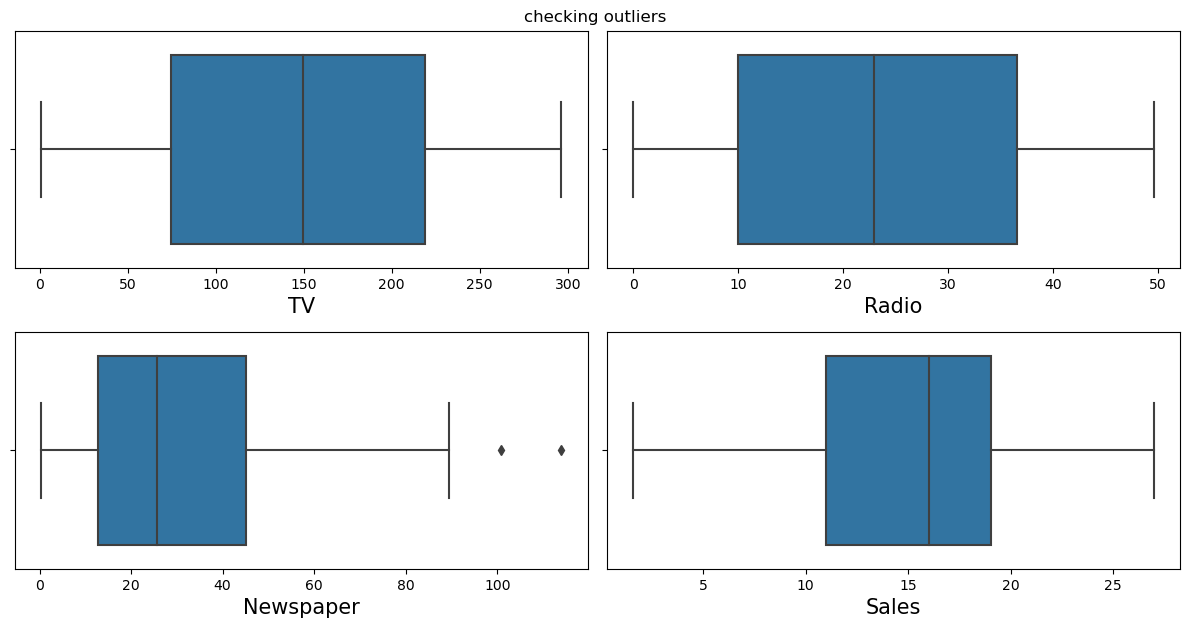

In [12]:
plt.figure(figsize=(12,12))
plt.suptitle('checking outliers')
pltn=1
for i in numcol:
    if pltn<8:
        ax=plt.subplot(4,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=15)
        pltn=pltn+1
plt.tight_layout()

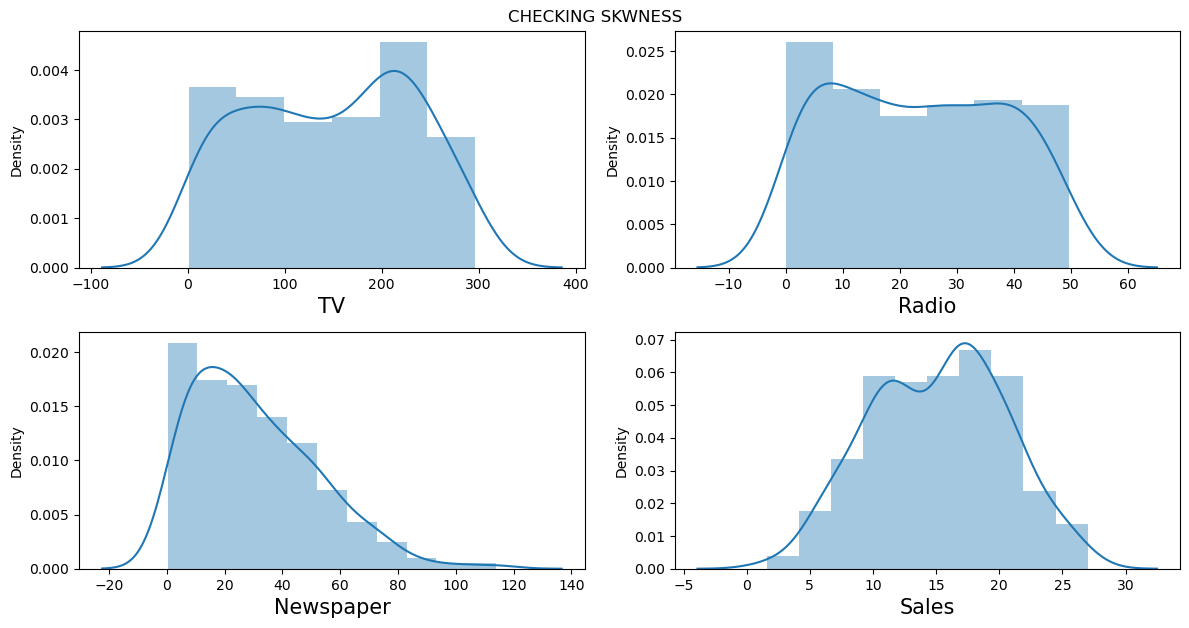

In [13]:
# checking for sckewness
plt.figure(figsize=(12,12))
plt.suptitle("CHECKING SKWNESS")
pltn=1
for i in numcol:
 if pltn<=8:
   ax=plt.subplot(4,2,pltn)
   sns.distplot(df[i])
   plt.xlabel(i,fontsize=15)
   pltn=pltn+1
plt.tight_layout()

oservation:There is null values are preset in newspaper

In [14]:
q1,q3=np.percentile(df['Newspaper'],[25,75])
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
ul,ll

(93.625, -35.775000000000006)

In [15]:
def impute_outlier(value):
    if value> ul:
        return a
    elif value <ll:
        return a
    else:
        return value

In [16]:
a=df['Newspaper'].mean()
df['Newspaper']=df['Newspaper'].apply(impute_outlier)

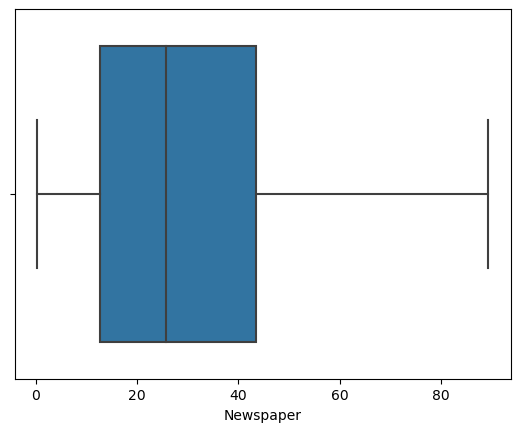

In [17]:
sns.boxplot(df['Newspaper'])
plt.show()

<AxesSubplot:>

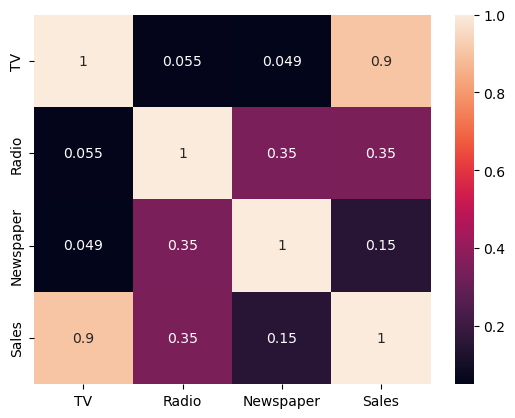

In [18]:
#checking correlation
sns.heatmap(df.corr(),annot=True)

# Model Building

In [19]:
#split data into dependant and independant
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [20]:
x

array([[230.1  ,  37.8  ,  69.2  ],
       [ 44.5  ,  39.3  ,  45.1  ],
       [ 17.2  ,  45.9  ,  69.3  ],
       [151.5  ,  41.3  ,  58.5  ],
       [180.8  ,  10.8  ,  58.4  ],
       [  8.7  ,  48.9  ,  75.   ],
       [ 57.5  ,  32.8  ,  23.5  ],
       [120.2  ,  19.6  ,  11.6  ],
       [  8.6  ,   2.1  ,   1.   ],
       [199.8  ,   2.6  ,  21.2  ],
       [ 66.1  ,   5.8  ,  24.2  ],
       [214.7  ,  24.   ,   4.   ],
       [ 23.8  ,  35.1  ,  65.9  ],
       [ 97.5  ,   7.6  ,   7.2  ],
       [204.1  ,  32.9  ,  46.   ],
       [195.4  ,  47.7  ,  52.9  ],
       [ 67.8  ,  36.6  ,  30.554],
       [281.4  ,  39.6  ,  55.8  ],
       [ 69.2  ,  20.5  ,  18.3  ],
       [147.3  ,  23.9  ,  19.1  ],
       [218.4  ,  27.7  ,  53.4  ],
       [237.4  ,   5.1  ,  23.5  ],
       [ 13.2  ,  15.9  ,  49.6  ],
       [228.3  ,  16.9  ,  26.2  ],
       [ 62.3  ,  12.6  ,  18.3  ],
       [262.9  ,   3.5  ,  19.5  ],
       [142.9  ,  29.3  ,  12.6  ],
       [240.1  ,  16.7  ,  2

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [23]:
#split training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [24]:
x_test

array([[163.3  ,  31.6  ,  52.9  ],
       [195.4  ,  47.7  ,  52.9  ],
       [292.9  ,  28.3  ,  43.2  ],
       [ 11.7  ,  36.9  ,  45.2  ],
       [220.3  ,  49.   ,   3.2  ],
       [ 75.1  ,  35.   ,  52.7  ],
       [216.8  ,  43.9  ,  27.2  ],
       [ 50.   ,  11.6  ,  18.4  ],
       [222.4  ,   3.4  ,  13.1  ],
       [175.1  ,  22.5  ,  31.5  ],
       [ 31.5  ,  24.6  ,   2.2  ],
       [ 56.2  ,   5.7  ,  29.7  ],
       [234.5  ,   3.4  ,  84.8  ],
       [  5.4  ,  29.9  ,   9.4  ],
       [139.5  ,   2.1  ,  26.6  ],
       [170.2  ,   7.8  ,  35.2  ],
       [  7.3  ,  28.1  ,  41.4  ],
       [197.6  ,  23.3  ,  14.2  ],
       [ 75.3  ,  20.3  ,  32.5  ],
       [237.4  ,  27.5  ,  11.   ],
       [229.5  ,  32.3  ,  74.2  ],
       [ 67.8  ,  36.6  ,  30.554],
       [ 38.   ,  40.3  ,  11.9  ],
       [250.9  ,  36.5  ,  72.3  ],
       [ 69.   ,   9.3  ,   0.9  ],
       [ 53.5  ,   2.   ,  21.4  ],
       [213.5  ,  43.   ,  33.8  ],
       [139.3  ,  14.5  ,  1

In [25]:
x_train

array([[284.3  ,  10.6  ,   6.4  ],
       [184.9  ,  21.   ,  22.   ],
       [112.9  ,  17.4  ,  38.6  ],
       [ 23.8  ,  35.1  ,  65.9  ],
       [290.7  ,   4.1  ,   8.5  ],
       [ 19.4  ,  16.   ,  22.3  ],
       [293.6  ,  27.7  ,   1.8  ],
       [ 18.7  ,  12.1  ,  23.4  ],
       [134.3  ,   4.9  ,   9.3  ],
       [ 25.6  ,  39.   ,   9.3  ],
       [100.4  ,   9.6  ,   3.6  ],
       [ 80.2  ,   0.   ,   9.2  ],
       [188.4  ,  18.1  ,  25.6  ],
       [177.   ,  33.4  ,  38.7  ],
       [125.7  ,  36.9  ,  79.2  ],
       [209.6  ,  20.6  ,  10.7  ],
       [142.9  ,  29.3  ,  12.6  ],
       [184.9  ,  43.9  ,   1.7  ],
       [222.4  ,   4.3  ,  49.8  ],
       [241.7  ,  38.   ,  23.2  ],
       [ 17.2  ,  45.9  ,  69.3  ],
       [120.5  ,  28.5  ,  14.2  ],
       [ 89.7  ,   9.9  ,  35.7  ],
       [191.1  ,  28.7  ,  18.2  ],
       [ 75.5  ,  10.8  ,   6.   ],
       [193.2  ,  18.4  ,  65.7  ],
       [ 85.7  ,  35.8  ,  49.3  ],
       [266.9  ,  43.8  ,   

#use LinearRegression

In [26]:
#making model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=reg.predict(x_test)

In [28]:
y_pred

array([17.20328757, 20.56926991, 23.72787328,  9.53036563, 21.54880054,
       12.81369502, 21.07701133,  8.74057557, 17.10601541, 16.6972582 ,
        8.91439449,  8.58270045, 18.46208272,  8.12511787, 12.65633499,
       14.97068492,  8.35876805, 17.81621067, 11.12537509, 20.34970681,
       21.03821408, 12.36686819, 10.96094187, 22.59681171,  9.35335077,
        7.97842397, 20.87306829, 13.74929939, 10.83177946,  7.93871154,
       15.89103694, 10.67840763, 21.00058333, 10.93893211, 21.54249361,
       21.03036078, 12.16401463, 22.92103832, 12.53608349,  6.53503409,
       11.93179899, 15.2049702 , 10.07556757,  9.50189306, 17.1144975 ,
        7.25570082, 10.51609298, 15.22562503, 11.22711867, 11.75115678,
       14.00484084, 14.58189995, 10.88747107,  9.57830857,  9.02020563,
       12.52783065, 10.49350717, 25.06350461,  7.96226127, 15.71400995])

In [29]:
#check r2 score
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.9079419839433419

#Use ridge and lasso method

In [30]:
from sklearn.linear_model import Ridge,Lasso
ridge_reg=Ridge()
lasso_reg=Lasso()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
alpha_values=[0.01,0.1,1.0,10.0,100.0]
ridge_param={'alpha':alpha_values}
lasso_param={'alpha':alpha_values}

In [33]:
ridge_grid=GridSearchCV(ridge_reg,ridge_param,cv=5,scoring='r2')
lasso_grid=GridSearchCV(lasso_reg,lasso_param,cv=5,scoring='r2')

In [34]:
ridge_grid.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, scoring='r2')

In [35]:
lasso_grid.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}, scoring='r2')

In [36]:
#to check best alpha value
ridge_best_alpha=ridge_grid.best_params_['alpha']
ridge_best_alpha

100.0

In [37]:
lasso_best_alpha=lasso_grid.best_params_['alpha']
lasso_best_alpha

1.0

In [38]:
#making best efficient model
ridge_reg_best=Ridge(alpha=ridge_best_alpha)
lasso_reg_best=Lasso(alpha=lasso_best_alpha)

In [39]:
ridge_reg_best.fit(x_train,y_train)

Ridge(alpha=100.0)

In [40]:
lasso_reg_best.fit(x_train,y_train)

Lasso()

In [41]:
#predict y for ridge
y_test_pred_ridge=ridge_reg_best.predict(x_test)
y_test_pred_ridge

array([17.20196214, 20.56187744, 23.72692877,  9.5266378 , 21.53719704,
       12.81117173, 21.06910858,  8.74429572, 17.11223599, 16.69773866,
        8.91205634,  8.58946615, 18.47362581,  8.12135616, 12.66413303,
       14.9769549 ,  8.35806001, 17.81508078, 11.1268577 , 20.3467236 ,
       21.0381427 , 12.36210498, 10.95343483, 22.59500278,  9.3566111 ,
        7.98596154, 20.86599734, 13.75123018, 10.83594424,  7.93541544,
       15.89818341, 10.67876501, 20.99307842, 10.93593926, 21.54649711,
       21.02440417, 12.15373298, 22.92111654, 12.53760503,  6.54269638,
       11.93726219, 15.20852805, 10.07487841,  9.50521827, 17.12127721,
        7.2620516 , 10.51980956, 15.22468692, 11.23418402, 11.74871227,
       13.9965378 , 14.58676741, 10.88146642,  9.57423703,  9.02767815,
       12.53463968, 10.4947701 , 25.05791186,  7.96272314, 15.71968297])

In [42]:
y_train_pred_ridge=ridge_reg_best.predict(x_train)
y_train_pred_ridge

array([21.10042893, 16.97697041, 12.91091253, 10.19867285, 20.80399281,
        7.58777719, 23.29246261,  7.16462522, 12.49790491, 10.12983748,
       11.09943222,  9.09472478, 16.90575694, 17.97937554, 15.98359094,
       18.14997768, 15.47296222, 19.10357719, 17.56811303, 21.76616581,
       10.97614488, 14.20510989, 10.87427513, 18.05488029,  9.90865815,
       17.59204952, 13.42774289, 23.52783603, 11.05472189, 23.60885043,
        7.5158512 , 19.44550701, 24.60257789, 20.9917337 , 18.70288342,
       16.41294677, 13.98202594, 11.35284586, 19.51181094, 15.4665096 ,
       16.08129092, 10.36627727, 20.28612709, 12.5120005 , 21.19733523,
       11.75312306,  9.07644587, 19.39055404, 15.71919532, 18.41516331,
        9.69629911, 21.57987142, 24.84889946, 18.30397497, 18.88101155,
       14.94696725, 16.37388145,  9.08840791, 17.28961356, 21.03614503,
       18.14919728,  5.69637212,  6.15434652, 14.66265307, 19.35993651,
       18.93149858, 20.78536765, 23.17450451, 18.35371266, 21.08

In [43]:
#predict y for lasso
y_test_pred_lasso=lasso_reg_best.predict(x_test)
y_test_pred_lasso

array([17.13414327, 20.43344187, 23.67414292,  9.46790675, 21.48463802,
       12.74036434, 20.99500645,  8.8167184 , 17.20554616, 16.69693044,
        8.96702017,  8.6634391 , 18.44599186,  8.1480009 , 12.74780761,
       15.0228776 ,  8.33749509, 17.83806473, 11.14218446, 20.35610219,
       20.92565082, 12.32330351, 10.93556448, 22.46857083,  9.46456395,
        8.08725901, 20.7844122 , 13.81809326, 10.89141654,  7.98357985,
       15.98307508, 10.71770083, 20.84637453, 10.7786277 , 21.55663355,
       21.01897265, 12.11662015, 22.84055271, 12.61397624,  6.64918395,
       12.00915704, 15.2965181 , 10.06625403,  9.57301441, 17.21381883,
        7.37150543, 10.53707861, 15.24236815, 11.295478  , 11.76581818,
       13.91373515, 14.67277321, 10.73047729,  9.49974529,  9.14199132,
       12.59863561, 10.55478574, 24.94216107,  8.01020623, 15.82713524])

In [44]:
y_train_pred_lasso=lasso_reg_best.predict(x_train)
y_train_pred_lasso

array([21.17307501, 16.99639793, 12.92264168, 10.11058485, 20.89567252,
        7.64105018, 23.31088313,  7.23003866, 12.60100394, 10.12218237,
       11.19867275,  9.22086336, 16.92916481, 17.92748411, 15.85670428,
       18.18723726, 15.48268072, 19.0752427 , 17.596926  , 21.71729826,
       10.84452441, 14.21724471, 10.91990775, 18.05257644, 10.00209644,
       17.54694291, 13.35870271, 23.48616397, 11.04403581, 23.48866255,
        7.52450946, 19.32319515, 24.54203283, 21.04291198, 18.73869828,
       16.41054239, 13.99499274, 11.34040319, 19.53956072, 15.42919202,
       16.07671444, 10.45063497, 20.23194371, 12.62569986, 21.21624193,
       11.77528951,  9.15825906, 19.41531505, 15.79224213, 18.50014738,
        9.6738643 , 21.45605627, 24.70977774, 18.23185629, 18.83689954,
       14.9400957 , 16.30941556,  9.07145218, 17.27921479, 21.02593976,
       18.14620086,  5.80039316,  6.25255841, 14.56333209, 19.43816055,
       18.95420185, 20.78348967, 23.05102453, 18.40304495, 21.02

In [45]:
#check r2 score for ridge
r2_test=r2_score(y_test,y_test_pred_ridge)
r2_train=r2_score(y_train,y_train_pred_ridge)
print('r2_test: ',r2_test)
print('r2_train: ',r2_train)

r2_test:  0.9078675084312049
r2_train:  0.892341649755272


In [46]:
#check r2 score for lasso
r2_test=r2_score(y_test,y_test_pred_lasso)
r2_train=r2_score(y_train,y_train_pred_lasso)
print('r2_test: ',r2_test)
print('r2_train: ',r2_train)

r2_test:  0.9085589656843029
r2_train:  0.8921281813456953
